In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import warnings

warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv("movies.csv")
credits = pd.read_csv("credits.csv")

In [3]:
movies.shape , credits.shape

((4803, 20), (4803, 4))

In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies['id'].unique().sum()

274565821

In [7]:
credits['movie_id'].unique().sum()

274565821

- we can merge movies and credits on the basis of movie_id and id

In [8]:
movie_credits = pd.merge(movies,credits,left_on='id',right_on='movie_id')

In [9]:
movie_credits.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
temp_df = movie_credits[["genres","keywords","overview","production_companies","production_countries","spoken_languages","cast","crew"]]
temp_df.sample(5)

,genres,keywords,overview,production_companies,production_countries,spoken_languages,cast,crew
3898,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 30, ""name"": ""individual""}, {""id"": 236,...","Brick, an alcoholic ex-football player, drinks...","[{""name"": ""Avon Production"", ""id"": 100}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 4, ""character"": ""Maggie"", ""credit...","[{""credit_id"": ""52fe422fc3a36847f800a6f7"", ""de..."
2596,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...","[{""id"": 680, ""name"": ""montana""}, {""id"": 798, ""...",Four sons of well-known New York mobsters must...,"[{""name"": ""Lawrence Bender Productions"", ""id"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""cs"", ""name"": ""\u010cesk\u00fd""...","[{""cast_id"": 1, ""character"": ""Matty Demaret"", ...","[{""credit_id"": ""52fe4480c3a36847f8099d47"", ""de..."
4181,"[{""id"": 35, ""name"": ""Comedy""}]","[{""id"": 12394, ""name"": ""chainsaw""}, {""id"": 162...",A mourning son makes a deal to reanimate his o...,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 2, ""character"": ""Mr. Abner"", ""cre...","[{""credit_id"": ""52fe468fc3a36847f810594b"", ""de..."
43,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","All grown up in post-apocalyptic 2018, John Co...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""cast_id"": 18, ""character"": ""John Connor"", ""...","[{""credit_id"": ""52fe424ec3a36847f8013ffd"", ""de..."
2407,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 387, ""name"": ""california""}, {""id"": 270...",Two middle-aged men embark on a spiritual jour...,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""hy"", ""name"": """"}, {""iso_639_1""...","[{""cast_id"": 1, ""character"": ""Miles"", ""credit_...","[{""credit_id"": ""52fe4519c3a36847f80bc72f"", ""de..."


In [11]:
temp_df["genres"][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [12]:
json.loads(temp_df["genres"][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [13]:
json.loads(temp_df["keywords"][0])

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [14]:
json.loads(temp_df["production_companies"][0])

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [15]:
json.loads(temp_df["production_countries"][0])

[{'iso_3166_1': 'US', 'name': 'United States of America'},
 {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

In [16]:
json.loads(temp_df["cast"][0])

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [17]:
json.loads(temp_df["crew"][0])

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [18]:
movie_credits.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [19]:
temp_df["overview"][1]

'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'

In [20]:
movie_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [21]:
movie_credits.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [22]:
movie_credits.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180,-0.089377
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128,1.000000
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130,0.031202
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487,-0.050425
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944,-0.153536
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997,-0.270595
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000,-0.004128
movie_id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128,1.000000


<AxesSubplot:>

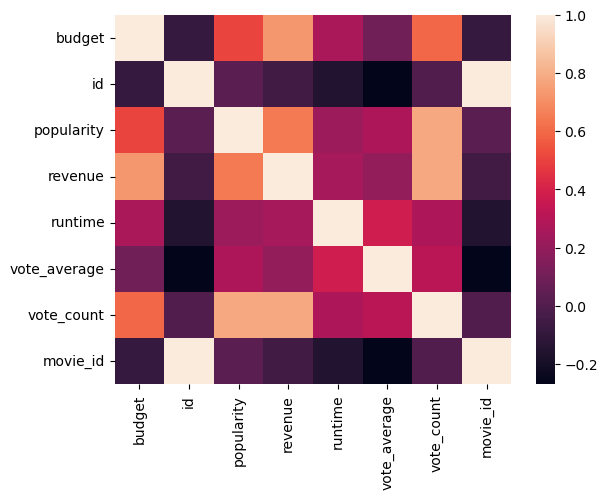

In [23]:
sns.heatmap(movie_credits.corr())

In [24]:
movie_credits.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [25]:
movie_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# DATA VISUALIZATION

## CATEGORICAL DATA

### COUNT PLOT

<AxesSubplot:xlabel='status', ylabel='count'>

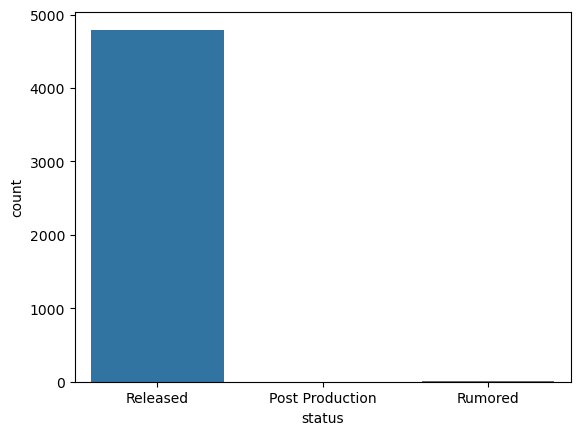

In [26]:
sns.countplot(data=movie_credits, x="status")

(array([3.536e+03, 7.720e+02, 2.500e+02, 1.420e+02, 5.100e+01, 3.400e+01,
        1.400e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <BarContainer object of 10 artists>)

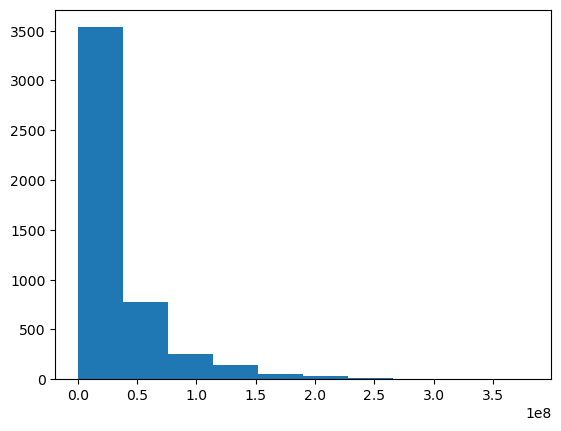

In [27]:
plt.hist(movie_credits["budget"])

(array([  64.,    3.,   21.,   84.,  356., 1303., 1984.,  903.,   79.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

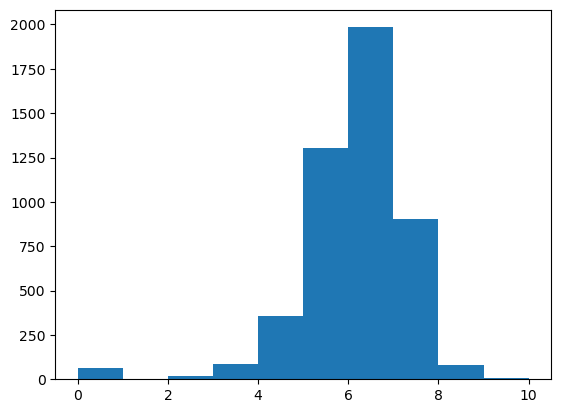

In [28]:
plt.hist(movie_credits["vote_average"])

(array([4.124e+03, 3.910e+02, 1.470e+02, 7.100e+01, 3.700e+01, 1.400e+01,
        1.100e+01, 4.000e+00, 3.000e+00, 1.000e+00]),
 array([    0. ,  1375.2,  2750.4,  4125.6,  5500.8,  6876. ,  8251.2,
         9626.4, 11001.6, 12376.8, 13752. ]),
 <BarContainer object of 10 artists>)

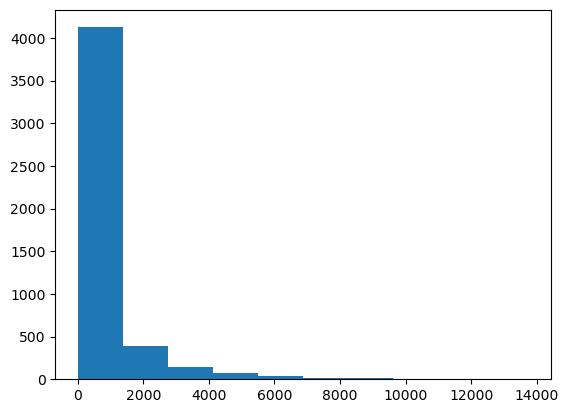

In [29]:
plt.hist(movie_credits["vote_count"])

<AxesSubplot:xlabel='budget', ylabel='Density'>

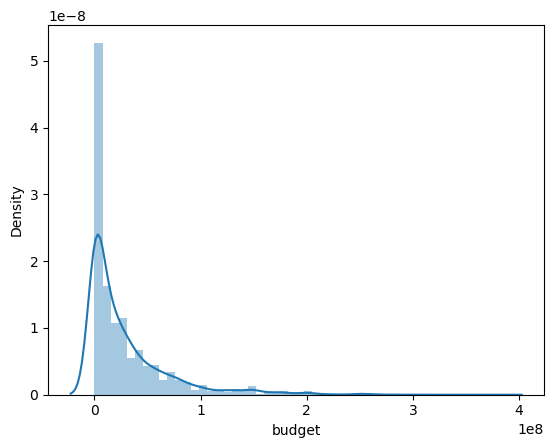

In [30]:
sns.distplot(movie_credits["budget"])

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

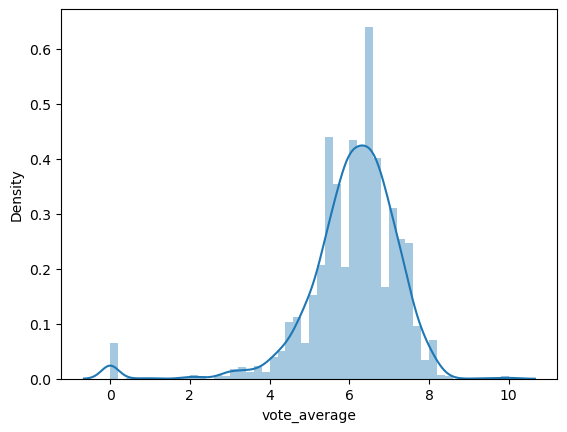

In [31]:
sns.distplot(movie_credits["vote_average"])

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

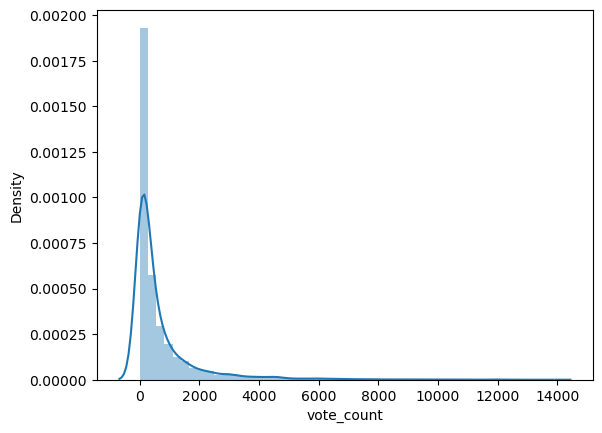

In [32]:
sns.distplot(movie_credits["vote_count"])

<AxesSubplot:xlabel='budget', ylabel='revenue'>

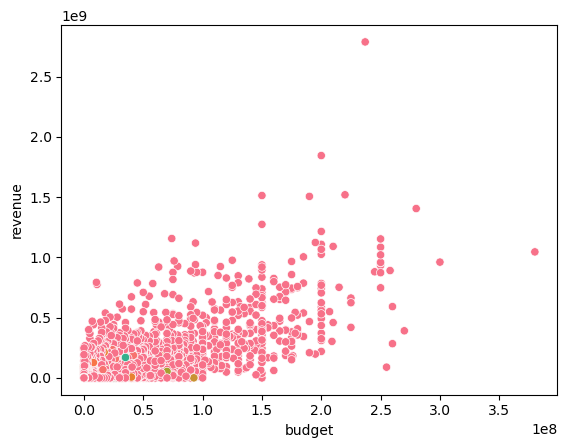

In [33]:
sns.scatterplot(x=movie_credits["budget"], y=movie_credits["revenue"], hue=movie_credits["original_language"],legend=False)

- in the above graph most of the data points of movie groups are in english

In [34]:
movie_credits['release_date'] = pd.to_datetime(movie_credits['release_date'])
movie_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [35]:
release_year = movie_credits["release_date"].dt.year.value_counts(dropna=False)
release_year = release_year[release_year >= 100].sort_values(ascending=False)

In [36]:
release_year

2009.0    247
2014.0    238
2006.0    237
2013.0    231
2008.0    227
2010.0    225
2011.0    223
2005.0    217
2015.0    216
2012.0    208
2004.0    204
2002.0    203
2007.0    195
2001.0    183
1999.0    171
2003.0    169
2000.0    166
1998.0    133
1997.0    112
2016.0    104
Name: release_date, dtype: int64

In [37]:
release_year.index = release_year.index.astype(int)
release_year

2009    247
2014    238
2006    237
2013    231
2008    227
2010    225
2011    223
2005    217
2015    216
2012    208
2004    204
2002    203
2007    195
2001    183
1999    171
2003    169
2000    166
1998    133
1997    112
2016    104
Name: release_date, dtype: int64

In [38]:
years = release_year.index.to_list()
movie_counts = release_year.values.tolist()

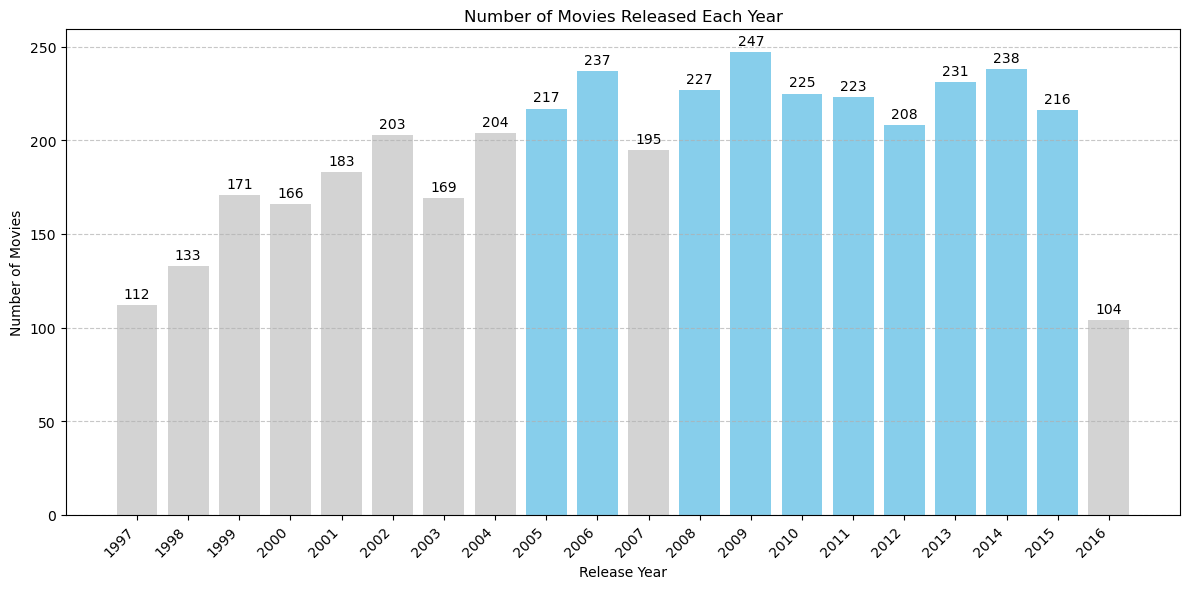

In [39]:

# Sort the data by movie_counts in descending order
sorted_years, sorted_movie_counts = zip(*sorted(zip(years, movie_counts), key=lambda x: x[1], reverse=True))

# Create a color map based on movie_counts
colors = np.where(np.array(sorted_movie_counts) >= np.median(sorted_movie_counts), 'skyblue', 'lightgray')

# Create a bar chart with custom aesthetics
plt.figure(figsize=(12, 6))  # Adjust the figure size
bars = plt.bar(sorted_years, sorted_movie_counts, color=colors)

# Set labels and title
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Each Year")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')  # ha='right' aligns labels to the right

# Display the count values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Display all years on the x-axis
plt.xticks(sorted_years)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [40]:
budget = movie_credits["budget"]
revenue = movie_credits["revenue"]

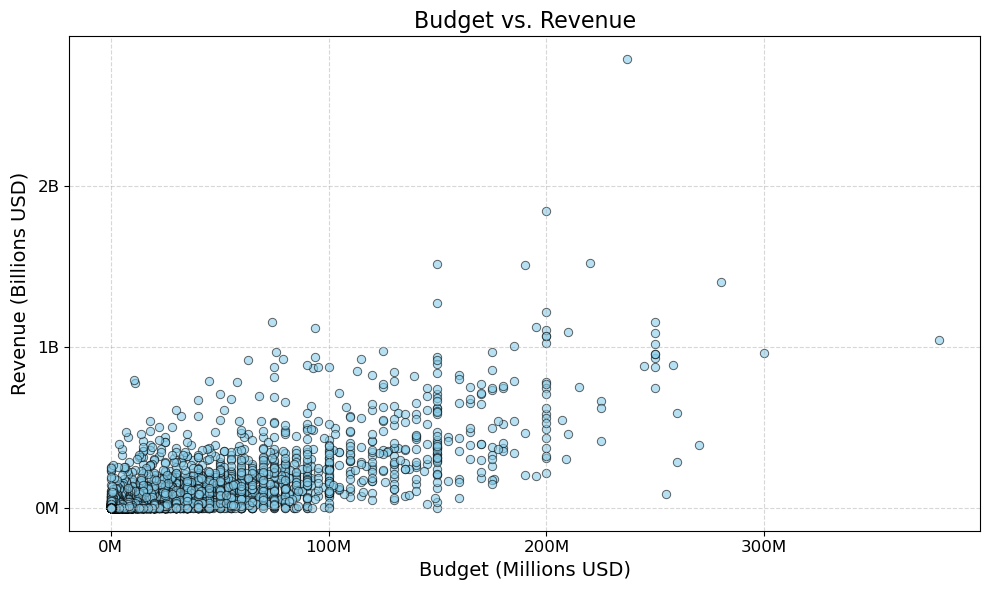

In [41]:
# Function to format y-axis tick labels correctly
def format_billion(value, pos):
    if value >= 1:
        return f'{value:.0f}B'
    else:
        return f'{value * 1000:.0f}M'

# Create a scatter plot with aesthetics
plt.figure(figsize=(10, 6))

# Customize the scatter plot with aesthetics
sns.scatterplot(
    x=movie_credits["budget"] / 1e6,  # Convert budget to million units
    y=movie_credits["revenue"] / 1e9,  # Convert revenue to billion units
    alpha=0.6,  # Increased alpha for more visible data points
    color='skyblue',
    edgecolor='k',  # Add black edges to the markers
    linewidth=0.7,  # Increase line width for better visibility
    marker='o',
)

# Set labels and title
plt.xlabel("Budget (Millions USD)", fontsize=14)
plt.ylabel("Revenue (Billions USD)", fontsize=14)
plt.title("Budget vs. Revenue", fontsize=16)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-axis and y-axis tick labels
x_ticks = [i * 100 for i in range(int(max(movie_credits["budget"] / 1e6) / 100) + 1)]
y_ticks = [i for i in range(int(max(movie_credits["revenue"] / 1e9) + 1))]
plt.gca().xaxis.set_major_locator(plt.FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(plt.FixedLocator(y_ticks))

# Format x-axis as million
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Format y-axis with the format_billion function
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_billion))

# Show x-ticks, y-ticks, and their numbers along the axis lines
plt.xticks(x_ticks, fontsize=12)
plt.yticks(y_ticks, fontsize=12)

# Show the plot with improved aesthetics
plt.tight_layout()
plt.show()

In [42]:
genre_data = movie_credits["genres"]
genre_data

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

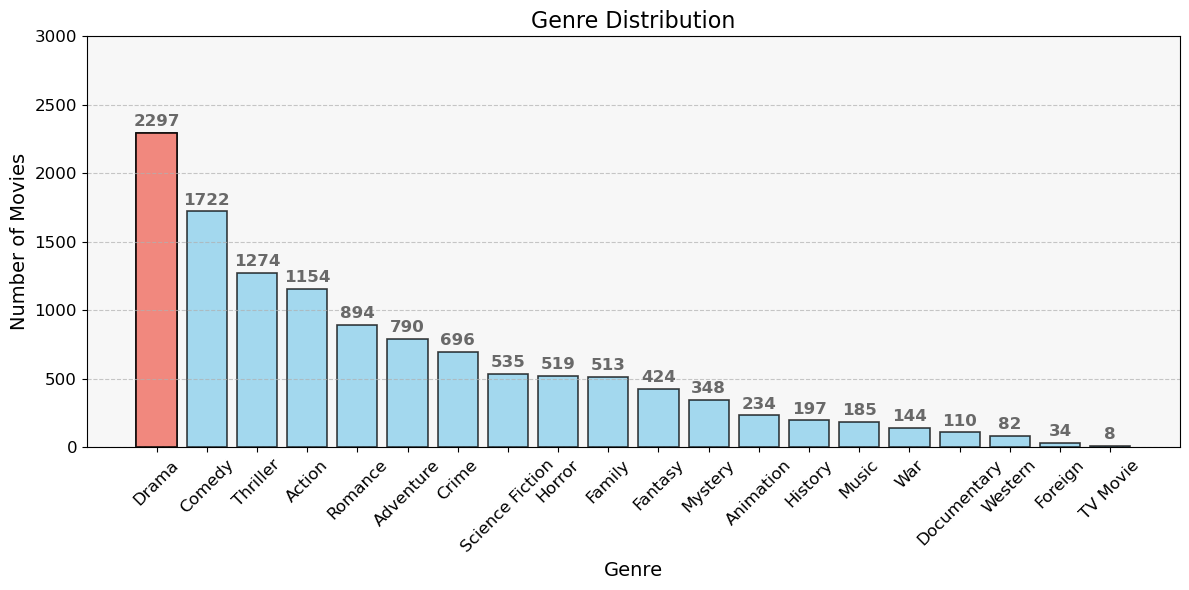

In [43]:
# Create a DataFrame from the sample data
df = pd.DataFrame({'genres': genre_data})

# Function to extract genre names from JSON data
def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return [genre['name'] for genre in genres]

# Apply the extract_genres function to each row in the DataFrame
df['genre_names'] = df['genres'].apply(extract_genres)

# Flatten the list of genre names
all_genres = [genre for genres in df['genre_names'] for genre in genres]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Find the most common genre
most_common_genre = genre_counts.idxmax()

# Create a stylish bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.2)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Genre Distribution', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')

# Highlight the most common genre
plt.bar(most_common_genre, genre_counts[most_common_genre], color='salmon', alpha=0.9, edgecolor='black', linewidth=1.2)

# customised y-ticks range
plt.yticks(range(0, 3001, 500), fontsize=12)

# Adding data labels
for genre, count in zip(genre_counts.index, genre_counts.values):
    plt.text(genre, count + 50, str(count), ha='center', fontsize=12, fontweight='bold', color='dimgrey')

# Customize tick labels
plt.xticks(fontsize=12)

# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Display the chart with improved aesthetics
plt.tight_layout()
plt.show()

### `Release Date Time Series:`
    Create a time series plot to show how the number of movie releases has changed over time. You can group the data by year or month and plot the count of movies released.

In [44]:
movie_credits["release_date"]

0      2009-12-10
1      2007-05-19
2      2015-10-26
3      2012-07-16
4      2012-03-07
          ...    
4798   1992-09-04
4799   2011-12-26
4800   2013-10-13
4801   2012-05-03
4802   2005-08-05
Name: release_date, Length: 4803, dtype: datetime64[ns]

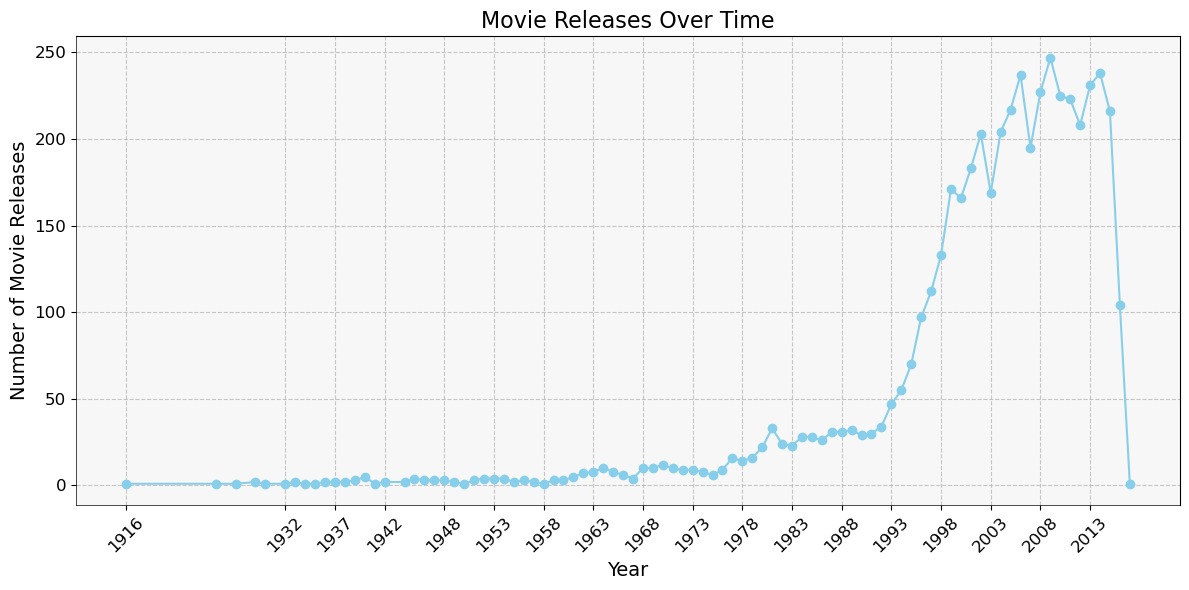

In [45]:
release_dates = movie_credits["release_date"]

# Extract the release years from the dates
release_years = release_dates.dt.year

# Count the number of movie releases per year
movie_count_per_year = release_years.value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(movie_count_per_year.index, movie_count_per_year.values, marker='o', color='skyblue', linestyle='-', markersize=6)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movie Releases', fontsize=14)
plt.title('Movie Releases Over Time', fontsize=16)

# Customize the appearance
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(0.5)
plt.gca().spines['right'].set_visible(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Adding a background color
plt.gca().set_facecolor('#f7f7f7')

# Limit the number of x-axis ticks
plt.xticks(movie_count_per_year.index[::5])  # Show every 5 years

plt.tight_layout()
plt.show()

### `Language Distribution Pie Chart:`
    Visualize the distribution of original languages in your dataset using a pie chart. It can show which languages are most common.

In [46]:
df = movie_credits[["spoken_languages"]]
df.head()

,spoken_languages
0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [47]:
# Function to extract language names from JSON data
def extract_languages(language_json):
    languages = json.loads(language_json)
    return [lang['name'] for lang in languages]

In [48]:
all_languages = df['spoken_languages'].apply(extract_languages)
all_languages.head()

0                                 [English, Español]
1                                          [English]
2    [Français, English, Español, Italiano, Deutsch]
3                                          [English]
4                                          [English]
Name: spoken_languages, dtype: object

In [49]:
final_languages = []

for i in all_languages.values:
    final_languages.extend(i)

In [50]:
final_languages[:10]

['English',
 'Español',
 'English',
 'Français',
 'English',
 'Español',
 'Italiano',
 'Deutsch',
 'English',
 'English']

In [51]:
# Count the occurrences of each language
language_counts = pd.Series(final_languages).value_counts()

# Filter languages with more than 100 occurrences
language_counts = language_counts[language_counts > 100]
language_counts

English     4485
Français     437
Español      351
Deutsch      262
Italiano     188
Pусский      185
普通话          107
dtype: int64

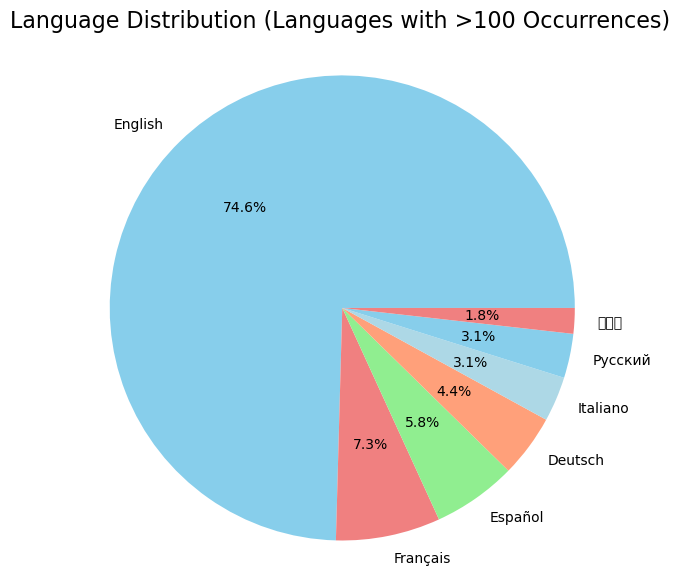

In [52]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue'])
plt.title('Language Distribution (Languages with >100 Occurrences)', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

### `Vote Average Distribution Histogram:`
    Create a histogram to show the distribution of vote averages for movies. This can help you understand the general sentiment or rating distribution of the movies.

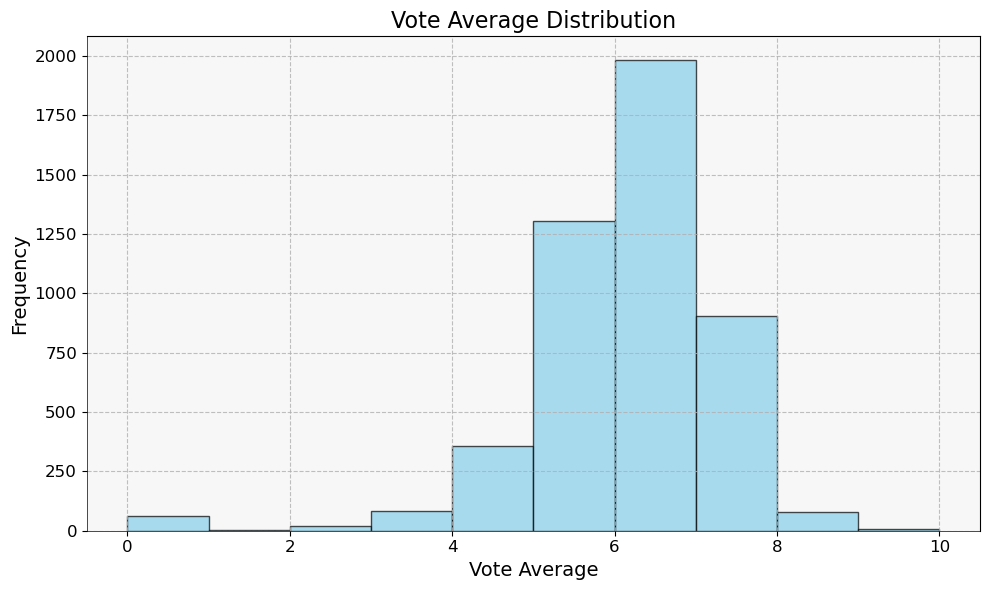

In [53]:
vote_averages = movie_credits["vote_average"].values

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(vote_averages, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Vote Average", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Vote Average Distribution", fontsize=16)

# Customize the appearance
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(0.5)
plt.gca().spines['right'].set_visible(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Add a background color
plt.gca().set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

### `Tagline Word Cloud:` 
    Generate a word cloud from movie taglines to visualize the most common words or phrases used in movie marketing.

In [54]:
movie_credits["tagline"].dropna()

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
                              ...                        
4795              Sometimes you've got to break the rules
4796                   What happens if it actually works?
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4801                             A New Yorker in Shanghai
Name: tagline, Length: 3959, dtype: object

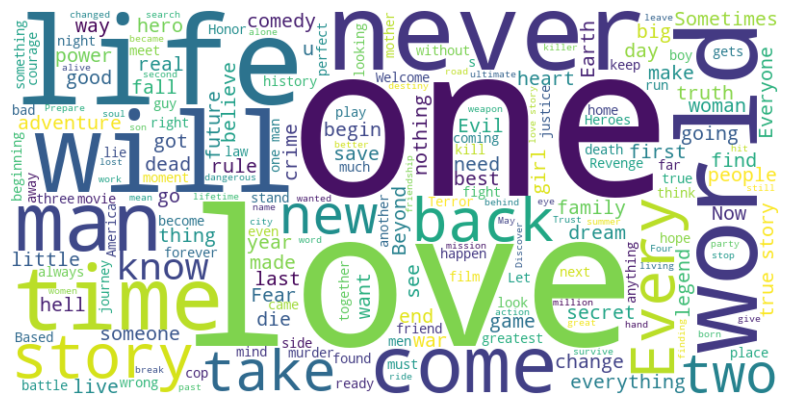

In [55]:
from wordcloud import WordCloud


taglines = movie_credits["tagline"].dropna()

# Combine all taglines into a single text
taglines_text = " ".join(taglines)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(taglines_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels

plt.show()

### `**Overview Word Cloud:**` 
     Generate a word cloud from movie overviews to visualize the most common words or themes in movie descriptions.

In [56]:
movie_credits["overview"].isnull().sum()

3

In [57]:
movie_credits["overview"].dropna().values.tolist()[:3]

['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.',
 'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.']

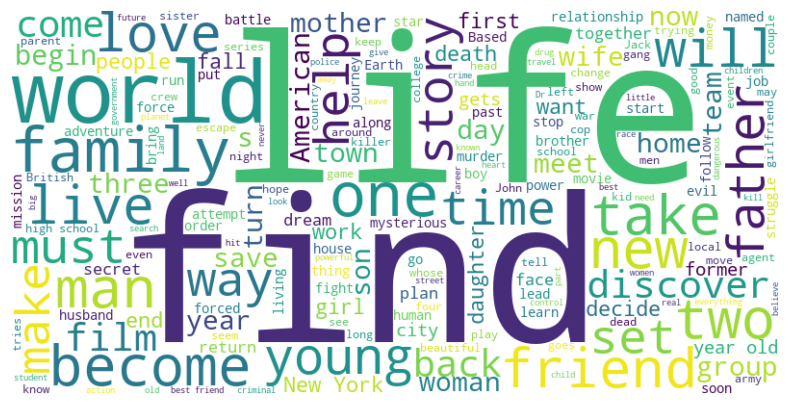

In [58]:
# Sample data: List of movie overviews
overviews = movie_credits["overview"].dropna().values.tolist()

# Combine all overviews into a single text
overviews_text = " ".join(overviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overviews_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels

plt.show()